Import stuff from the folder

In [1]:
import scan_csv # The label scanner
from LabelGenerator import * # Generates labels
from client import OIDClient # The image request client
from FastSlidingWindow import * # Creates patches
from Util import * # Tools

First things first load the dictionaries (Takes a while)

In [2]:
ld = scan_csv.open_dicts()
ld.keys()


Loading dicts...
Total time in fractional seconds: 23.515625


dict_keys(['class names', 'class encodings', 'train codec', 'train class', 'val codec', 'val class'])

So you can see the stuff ld contains


class names is the dictionary for [encoding : class name]  (eg-> /m/klfsa : Face)  
class encoding is the dictionary for class [name : encoding]  (eg-> Face : /m/klfsa)

codecs are the image id to raw label dictionaries  
class are the class encoding to list of image id dictionaries

In [3]:
first_key = list(ld['train codec'].keys())[0]
print(first_key)
for label in ld['train codec'][first_key]:
    print(label)

000002b66c9c498e
['xclick', '/m/01g317', '1', '0.012500', '0.195312', '0.148438', '0.587500', '0', '1', '0', '0', '0']
['xclick', '/m/01g317', '1', '0.025000', '0.276563', '0.714063', '0.948438', '0', '1', '0', '0', '0']
['xclick', '/m/01g317', '1', '0.151562', '0.310937', '0.198437', '0.590625', '1', '0', '0', '0', '0']
['xclick', '/m/01g317', '1', '0.256250', '0.429688', '0.651563', '0.925000', '1', '0', '0', '0', '0']
['xclick', '/m/01g317', '1', '0.257812', '0.346875', '0.235938', '0.385938', '1', '0', '0', '0', '0']
['xclick', '/m/01g317', '1', '0.320312', '0.368750', '0.260938', '0.328125', '1', '0', '0', '0', '0']
['xclick', '/m/01g317', '1', '0.412500', '0.945312', '0.120312', '0.475000', '1', '0', '1', '0', '0']
['xclick', '/m/0284d', '1', '0.528125', '0.923437', '0.675000', '0.964063', '0', '0', '0', '0', '0']
['xclick', '/m/04bcr3', '1', '0.064062', '0.492188', '0.889063', '0.993750', '0', '0', '0', '0', '0']
['xclick', '/m/04bcr3', '1', '0.301562', '0.990625', '0.462500', '

Lets create the image client and label an image

Started client thread
(5, 3, 300, 300, 3)
(5, 3, 601, 5)

(1024, 679, 3)
(300, 300, 3)


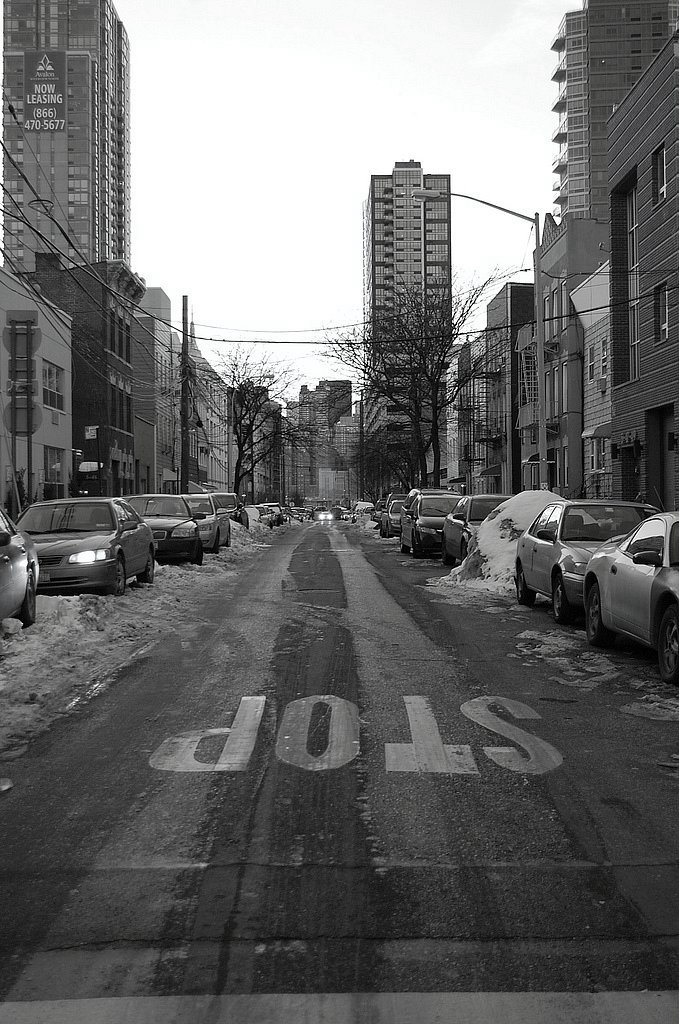

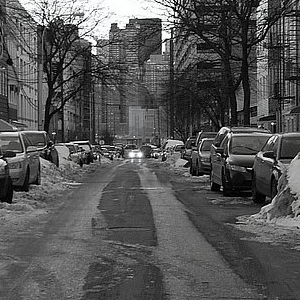

In [4]:
client = OIDClient('192.168.1.31', 33333) # change this ip to the provided
X, Y, image, cmap = label_image('f4d07a53ade71fea',
    ld['train codec'], ld['class names'], client, 250, 300)
# 250 stride
# 300 patch size

print(X.shape)
print(Y.shape)
print()
print(image.shape)
print(X[2, 1].shape)

imshow(image)
imshow(np.array(X[2, 1] * 255, dtype=image.dtype))

Lets draw the labels

Keep in mind that the patch size and stride effects the encoding of the labels

Thats why some of the wheels inside the car group are not labeled

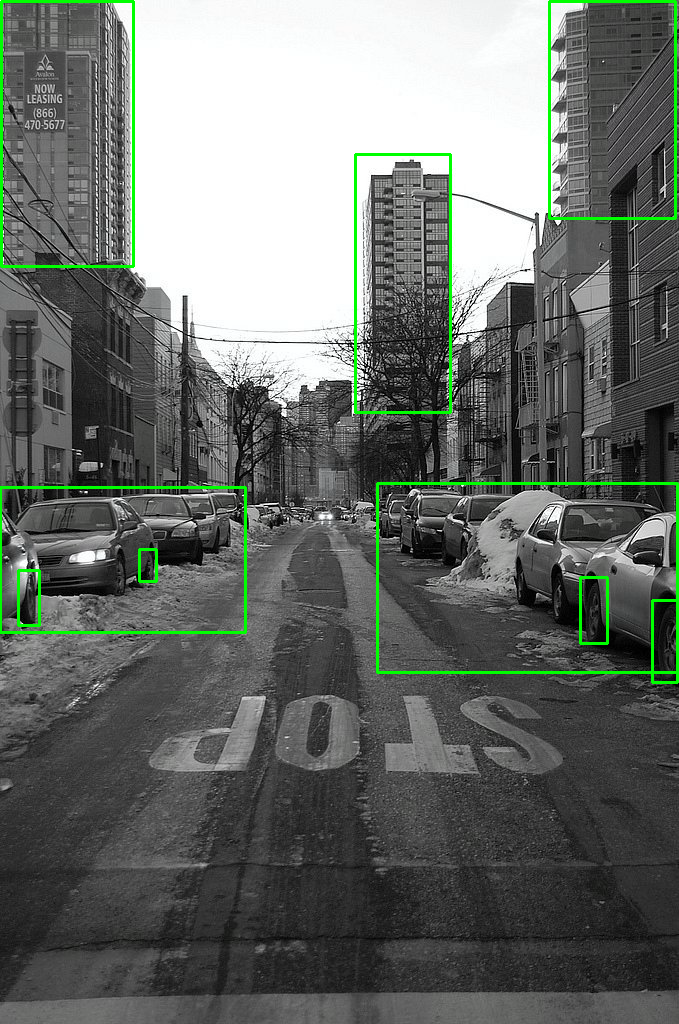

In [6]:
imshow(draw_from_label(image, Y, cmap, 300))

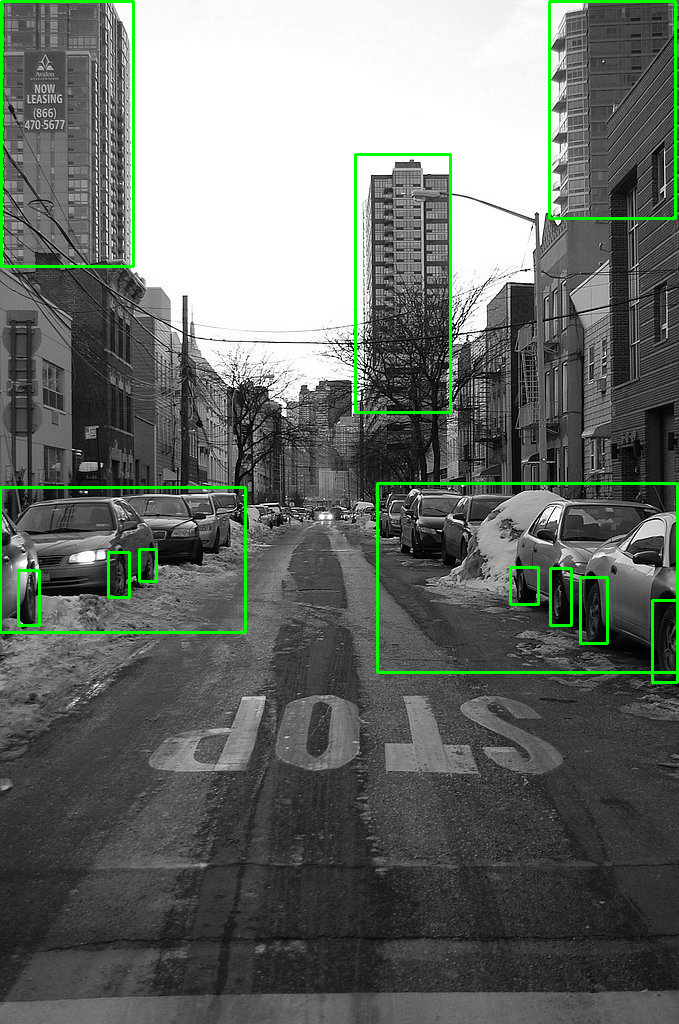

In [7]:
# smaller size
X, Y, image, cmap = label_image('f4d07a53ade71fea',
    ld['train codec'], ld['class names'], client, 40, 50)
imshow(draw_from_label(image, Y, cmap, 50))